In [168]:
import pandas as pd 
import numpy as np
class_majority = pd.read_csv("Datasets/modified_majority_class.csv")
class_majority=class_majority.drop(columns=['Unnamed: 0.1' , 'Unnamed: 0'])
class_majority.head()


,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C1,C2,C3
0,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0,0,6,2,1
1,0.0,129.0,80.0,0.0,0.0,31.2,0.703,29.0,0,3,5,3
2,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,0,3,5,3
3,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0,3,5,3
4,8.0,85.0,55.0,20.0,0.0,24.4,0.136,42.0,0,0,4,5


In [169]:
class_majority=class_majority.reset_index(drop=False)
class_majority.head()

,index,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C1,C2,C3
0,0,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0,0,6,2,1
1,1,0.0,129.0,80.0,0.0,0.0,31.2,0.703,29.0,0,3,5,3
2,2,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,0,3,5,3
3,3,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0,3,5,3
4,4,8.0,85.0,55.0,20.0,0.0,24.4,0.136,42.0,0,0,4,5


In [170]:
clustering_result=class_majority[['index','C1','C2','C3']]
clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
clustering_result

C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\2258915922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)


,Datapoint(x),C1,C2,C3
0,0,6,2,1
1,1,3,5,3
2,2,3,5,3
3,3,3,5,3
4,4,0,4,5
...,...,...,...,...
401,401,4,0,4
402,402,6,2,1
403,403,6,2,6
404,404,6,2,6


In [171]:
num_of_clusters=7
C1_datapoints={}
C2_datapoints={}
C3_datapoints={}
def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
       dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary
C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')
print("C1 clusters :",C1_datapoints)
print("C3 clusters :",C3_datapoints)
def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))
contingency_matrix1=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C3_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix1.append(common)
contingency_df1=pd.DataFrame(contingency_matrix1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df1

C1 clusters : {6: [0, 5, 8, 15, 17, 18, 23, 28, 31, 35, 39, 40, 41, 44, 46, 51, 52, 55, 57, 60, 61, 65, 70, 86, 107, 108, 116, 123, 126, 130, 132, 135, 137, 141, 144, 147, 149, 162, 163, 165, 168, 173, 174, 178, 185, 187, 196, 205, 207, 209, 214, 215, 216, 219, 221, 230, 243, 246, 259, 265, 266, 271, 272, 273, 278, 283, 284, 289, 292, 293, 295, 307, 309, 325, 326, 329, 339, 341, 348, 349, 350, 351, 355, 357, 361, 365, 368, 383, 386, 402, 403, 404], 3: [1, 2, 3, 7, 11, 14, 32, 34, 49, 53, 54, 71, 72, 78, 85, 87, 89, 100, 101, 106, 111, 119, 128, 129, 139, 157, 161, 164, 175, 182, 193, 200, 208, 213, 223, 237, 239, 241, 244, 247, 249, 287, 294, 300, 303, 305, 313, 321, 322, 324, 328, 334, 338, 340, 344, 356, 369, 372, 377, 388, 390, 391, 398], 0: [4, 13, 20, 24, 25, 29, 30, 38, 42, 43, 45, 48, 58, 76, 79, 80, 81, 92, 104, 105, 109, 120, 122, 124, 125, 133, 138, 150, 155, 160, 166, 171, 176, 183, 184, 186, 189, 194, 195, 204, 206, 211, 212, 222, 225, 226, 236, 248, 253, 255, 256, 260, 261

,C10,C11,C12,C13,C14,C15,C16
C30,0,84,0,0,4,4,0
C31,0,0,0,3,5,0,46
C32,0,0,0,0,0,20,0
C33,0,0,0,60,12,0,0
C34,0,0,13,0,23,3,0
C35,81,0,0,0,0,0,0
C36,0,0,2,0,0,0,46


In [172]:
print("C1 clusters :",C1_datapoints)
print("C2 clusters :",C2_datapoints)
contingency_matrix2=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C2_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix2.append(common)
contingency_df2=pd.DataFrame(contingency_matrix2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df2

C1 clusters : {6: [0, 5, 8, 15, 17, 18, 23, 28, 31, 35, 39, 40, 41, 44, 46, 51, 52, 55, 57, 60, 61, 65, 70, 86, 107, 108, 116, 123, 126, 130, 132, 135, 137, 141, 144, 147, 149, 162, 163, 165, 168, 173, 174, 178, 185, 187, 196, 205, 207, 209, 214, 215, 216, 219, 221, 230, 243, 246, 259, 265, 266, 271, 272, 273, 278, 283, 284, 289, 292, 293, 295, 307, 309, 325, 326, 329, 339, 341, 348, 349, 350, 351, 355, 357, 361, 365, 368, 383, 386, 402, 403, 404], 3: [1, 2, 3, 7, 11, 14, 32, 34, 49, 53, 54, 71, 72, 78, 85, 87, 89, 100, 101, 106, 111, 119, 128, 129, 139, 157, 161, 164, 175, 182, 193, 200, 208, 213, 223, 237, 239, 241, 244, 247, 249, 287, 294, 300, 303, 305, 313, 321, 322, 324, 328, 334, 338, 340, 344, 356, 369, 372, 377, 388, 390, 391, 398], 0: [4, 13, 20, 24, 25, 29, 30, 38, 42, 43, 45, 48, 58, 76, 79, 80, 81, 92, 104, 105, 109, 120, 122, 124, 125, 133, 138, 150, 155, 160, 166, 171, 176, 183, 184, 186, 189, 194, 195, 204, 206, 211, 212, 222, 225, 226, 236, 248, 253, 255, 256, 260, 261

,C10,C11,C12,C13,C14,C15,C16
C20,0,0,5,0,39,0,0
C21,0,0,0,0,0,27,0
C22,0,0,2,1,0,0,92
C23,0,84,0,0,0,0,0
C24,81,0,0,0,0,0,0
C25,0,0,0,62,5,0,0
C26,0,0,8,0,0,0,0


In [173]:
contigency_mat=pd.concat([contingency_df2, contingency_df1])
contigency_mat

,C10,C11,C12,C13,C14,C15,C16
C20,0,0,5,0,39,0,0
C21,0,0,0,0,0,27,0
C22,0,0,2,1,0,0,92
C23,0,84,0,0,0,0,0
C24,81,0,0,0,0,0,0
C25,0,0,0,62,5,0,0
C26,0,0,8,0,0,0,0
C30,0,84,0,0,4,4,0
C31,0,0,0,3,5,0,46
C32,0,0,0,0,0,20,0


In [174]:
def union(list1, list2):
  l = list1 + list2
  return len(set(l))
def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))
union_df1 = []
common_df1 = []
for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C3_datapoints[i],C1_datapoints[j])
    common_element = common_member(C3_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
  union_df1.append(uni)
  common_df1.append(common)
confusion_mat1 = np.divide(common_df1, union_df1)
confusion_mat1=pd.DataFrame(confusion_mat1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df1, union_df1
confusion_mat1

,C10,C11,C12,C13,C14,C15,C16
C30,0.0,0.913043,0.000000,0.000000,0.030303,0.034783,0.000000
C31,0.0,0.000000,0.000000,0.026316,0.053763,0.000000,0.460000
C32,0.0,0.000000,0.000000,0.000000,0.000000,0.740741,0.000000
C33,0.0,0.000000,0.000000,0.800000,0.115385,0.000000,0.000000
C34,0.0,0.000000,0.317073,0.000000,0.383333,0.047619,0.000000
C35,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C36,0.0,0.000000,0.032787,0.000000,0.000000,0.000000,0.489362


In [175]:
union_df2 = []
common_df2 = []
for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C2_datapoints[i],C1_datapoints[j])
    common_element = common_member(C2_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
  union_df2.append(uni)
  common_df2.append(common)
confusion_mat2 = np.divide(common_df2, union_df2)
confusion_mat2=pd.DataFrame(confusion_mat2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df2, union_df2
confusion_mat2

,C10,C11,C12,C13,C14,C15,C16
C20,0.0,0.0,0.092593,0.000000,0.795918,0.0,0.000000
C21,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000
C22,0.0,0.0,0.018519,0.006369,0.000000,0.0,0.968421
C23,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000
C24,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
C25,0.0,0.0,0.000000,0.911765,0.047170,0.0,0.000000
C26,0.0,0.0,0.533333,0.000000,0.000000,0.0,0.000000


In [176]:
confusion_mat=pd.concat([confusion_mat2, confusion_mat1])
print("-----------Confusion matrix----------")
confusion_mat


-----------Confusion matrix----------


,C10,C11,C12,C13,C14,C15,C16
C20,0.0,0.000000,0.092593,0.000000,0.795918,0.000000,0.000000
C21,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
C22,0.0,0.000000,0.018519,0.006369,0.000000,0.000000,0.968421
C23,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C24,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C25,0.0,0.000000,0.000000,0.911765,0.047170,0.000000,0.000000
C26,0.0,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000
C30,0.0,0.913043,0.000000,0.000000,0.030303,0.034783,0.000000
C31,0.0,0.000000,0.000000,0.026316,0.053763,0.000000,0.460000
C32,0.0,0.000000,0.000000,0.000000,0.000000,0.740741,0.000000


In [177]:
CCluster = []
index=[]
CLabel = ['C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16']
for i in range(len(confusion_mat)):
  l =confusion_mat.iloc[i]
  l = list(l)
  ind = l.index(max(l))
  index.append(ind)
  CCluster.append(CLabel[ind])
CCluster


['C14',
 'C15',
 'C16',
 'C11',
 'C10',
 'C13',
 'C12',
 'C11',
 'C16',
 'C15',
 'C13',
 'C14',
 'C10',
 'C16']

In [178]:
confusion_matrix = confusion_mat
confusion_matrix['CCluster'] = CCluster
confusion_matrix['index'] = index
confusion_matrix.head(14)

,C10,C11,C12,C13,C14,C15,C16,CCluster,index
C20,0.0,0.000000,0.092593,0.000000,0.795918,0.000000,0.000000,C14,4
C21,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,C15,5
C22,0.0,0.000000,0.018519,0.006369,0.000000,0.000000,0.968421,C16,6
C23,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C11,1
C24,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C10,0
C25,0.0,0.000000,0.000000,0.911765,0.047170,0.000000,0.000000,C13,3
C26,0.0,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000,C12,2
C30,0.0,0.913043,0.000000,0.000000,0.030303,0.034783,0.000000,C11,1
C31,0.0,0.000000,0.000000,0.026316,0.053763,0.000000,0.460000,C16,6
C32,0.0,0.000000,0.000000,0.000000,0.000000,0.740741,0.000000,C15,5


In [179]:
confusion_dict = confusion_matrix['index'].to_dict()
print(confusion_dict)


{'C20': 4, 'C21': 5, 'C22': 6, 'C23': 1, 'C24': 0, 'C25': 3, 'C26': 2, 'C30': 1, 'C31': 6, 'C32': 5, 'C33': 3, 'C34': 4, 'C35': 0, 'C36': 6}


In [180]:
new_clustering_result = pd.DataFrame(clustering_result)
def map_values(value):
    return confusion_dict.get('C2' + str(value), value)

# Replace values in column 'C2'
new_clustering_result['C2'] = new_clustering_result['C2'].apply(map_values)

# Function to map values from dictionary
def map_values(value):
    return confusion_dict.get('C3' + str(value), value)

# Replace values in column 'C3'
new_clustering_result['C3'] = clustering_result['C3'].apply(map_values)
print(new_clustering_result)

     Datapoint(x)  C1  C2  C3
0               0   6   6   6
1               1   3   3   3
2               2   3   3   3
3               3   3   3   3
4               4   0   0   0
..            ...  ..  ..  ..
401           401   4   4   4
402           402   6   6   6
403           403   6   6   6
404           404   6   6   6
405           405   5   5   4

[406 rows x 4 columns]


In [181]:
#Majority Voting

C = []
for i in range(len(new_clustering_result)):
  l = new_clustering_result.iloc[i]
  l = list(l[1:])
  majority_label = max(set(l), key = l.count)
  C.append(majority_label)

new_clustering_result['C'] = C
new_clustering_result

,Datapoint(x),C1,C2,C3,C
0,0,6,6,6,6
1,1,3,3,3,3
2,2,3,3,3,3
3,3,3,3,3,3
4,4,0,0,0,0
...,...,...,...,...,...
401,401,4,4,4,4
402,402,6,6,6,6
403,403,6,6,6,6
404,404,6,6,6,6


In [182]:
consensus_clustering_result=new_clustering_result.drop(columns=['C1', 'C2', 'C3'], axis = 1)
consensus_clustering_result

,Datapoint(x),C
0,0,6
1,1,3
2,2,3
3,3,3
4,4,0
...,...,...
401,401,4
402,402,6
403,403,6
404,404,6


In [183]:
class_majority.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
class_majority=class_majority.merge(consensus_clustering_result,on='Datapoint(x)')
class_majority=class_majority.drop(columns=['C1','C2','C3'])
class_majority

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
0,0,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0,0,6
1,1,0.0,129.0,80.0,0.0,0.0,31.2,0.703,29.0,0,3
2,2,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,0,3
3,3,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0,3
4,4,8.0,85.0,55.0,20.0,0.0,24.4,0.136,42.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
401,401,1.0,126.0,56.0,29.0,152.0,28.7,0.801,21.0,0,4
402,402,5.0,117.0,92.0,0.0,0.0,34.1,0.337,38.0,0,6
403,403,4.0,112.0,78.0,40.0,0.0,39.4,0.236,38.0,0,6
404,404,3.0,78.0,70.0,0.0,0.0,32.5,0.270,39.0,0,6


Cluster: 0


In [184]:
cluster_0 = class_majority[class_majority['C']==0]
cluster_0

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
4,4,8.0,85.0,55.0,20.0,0.0,24.4,0.136,42.0,0,0
13,13,0.0,123.0,88.0,37.0,0.0,35.2,0.197,29.0,0,0
20,20,6.0,154.0,78.0,41.0,140.0,46.1,0.571,27.0,0,0
24,24,5.0,147.0,78.0,0.0,0.0,33.7,0.218,65.0,0,0
25,25,6.0,105.0,70.0,32.0,68.0,30.8,0.122,37.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
373,373,3.0,150.0,76.0,0.0,0.0,21.0,0.207,37.0,0,0
374,374,3.0,99.0,80.0,11.0,64.0,19.3,0.284,30.0,0,0
387,387,1.0,92.0,62.0,25.0,41.0,19.5,0.482,25.0,0,0
395,395,0.0,117.0,0.0,0.0,0.0,33.8,0.932,44.0,0,0


Cluster: 1


In [185]:

cluster_1 = class_majority[class_majority['C']==1]
cluster_1

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
9,9,1.0,105.0,58.0,0.0,0.0,24.3,0.187,21.0,0,1
12,12,2.0,68.0,62.0,13.0,15.0,20.1,0.257,23.0,0,1
16,16,4.0,91.0,70.0,32.0,88.0,33.1,0.446,22.0,0,1
19,19,0.0,78.0,88.0,29.0,40.0,36.9,0.434,21.0,0,1
21,21,3.0,74.0,68.0,28.0,45.0,29.7,0.293,23.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
382,382,9.0,57.0,80.0,37.0,0.0,32.8,0.096,41.0,0,1
384,384,2.0,139.0,75.0,0.0,0.0,25.6,0.167,29.0,0,1
385,385,6.0,99.0,60.0,19.0,54.0,26.9,0.497,32.0,0,1
394,394,2.0,81.0,60.0,22.0,0.0,27.7,0.290,25.0,0,1


Cluster: 2

In [186]:
cluster_2 = class_majority[class_majority['C']==2]
cluster_2

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
56,56,4.0,147.0,74.0,25.0,293.0,34.9,0.385,30.0,0,2
93,93,5.0,155.0,84.0,44.0,545.0,38.7,0.619,34.0,0,2
98,98,0.0,114.0,80.0,34.0,285.0,44.2,0.167,27.0,0,2
114,114,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0,0,2
167,167,4.0,154.0,62.0,31.0,284.0,32.8,0.237,23.0,0,2
231,231,1.0,131.0,64.0,14.0,415.0,23.7,0.389,21.0,0,2
242,242,6.0,129.0,90.0,7.0,326.0,19.6,0.582,60.0,0,2
280,280,1.0,153.0,82.0,42.0,485.0,40.6,0.687,23.0,0,2


Cluster: 3


In [187]:

cluster_3 = class_majority[class_majority['C']==3]
cluster_3

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
1,1,0.0,129.0,80.0,0.0,0.0,31.2,0.703,29.0,0,3
2,2,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,0,3
3,3,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0,3
7,7,8.0,107.0,80.0,0.0,0.0,24.6,0.856,34.0,0,3
11,11,4.0,84.0,90.0,23.0,56.0,39.5,0.159,25.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
377,377,2.0,83.0,65.0,28.0,66.0,36.8,0.629,24.0,0,3
388,388,3.0,113.0,44.0,13.0,0.0,22.4,0.140,22.0,0,3
390,390,7.0,125.0,86.0,0.0,0.0,37.6,0.304,51.0,0,3
391,391,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0,0,3


Cluster: 4

In [188]:

cluster_4 = class_majority[class_majority['C']==4]
cluster_4

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
6,6,2.0,99.0,60.0,17.0,160.0,36.6,0.453,21.0,0,4
10,10,4.0,131.0,68.0,21.0,166.0,33.1,0.160,28.0,0,4
22,22,1.0,130.0,70.0,13.0,105.0,25.9,0.472,22.0,0,4
47,47,3.0,115.0,66.0,39.0,140.0,38.1,0.150,28.0,0,4
62,62,1.0,111.0,62.0,13.0,182.0,24.0,0.138,23.0,0,4
63,63,1.0,100.0,66.0,29.0,196.0,32.0,0.444,42.0,0,4
69,69,1.0,130.0,60.0,23.0,170.0,28.6,0.692,21.0,0,4
77,77,1.0,109.0,60.0,8.0,182.0,25.4,0.947,21.0,0,4
95,95,1.0,109.0,56.0,21.0,135.0,25.2,0.833,23.0,0,4
103,103,6.0,108.0,44.0,20.0,130.0,24.0,0.813,35.0,0,4


Cluster: 5

In [189]:

cluster_5 = class_majority[class_majority['C']==5]
cluster_5

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
36,36,2.0,122.0,52.0,43.0,158.0,36.2,0.816,28.0,0,5
66,66,7.0,136.0,74.0,26.0,135.0,26.0,0.647,51.0,0,5
73,73,0.0,126.0,84.0,29.0,215.0,30.7,0.520,24.0,0,5
82,82,2.0,108.0,62.0,10.0,278.0,25.3,0.881,22.0,0,5
91,91,1.0,143.0,86.0,30.0,330.0,30.1,0.892,23.0,0,5
118,118,3.0,103.0,72.0,30.0,152.0,27.6,0.730,27.0,0,5
159,159,1.0,119.0,88.0,41.0,170.0,45.3,0.507,26.0,0,5
202,202,2.0,157.0,74.0,35.0,440.0,39.4,0.134,30.0,0,5
218,218,5.0,105.0,72.0,29.0,325.0,36.9,0.159,28.0,0,5
250,250,1.0,143.0,84.0,23.0,310.0,42.4,1.076,22.0,0,5


Cluster: 6

In [190]:

cluster_6 = class_majority[class_majority['C']==6]
cluster_6

,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C
0,0,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0,0,6
5,5,2.0,120.0,54.0,0.0,0.0,26.8,0.455,27.0,0,6
8,8,1.0,144.0,82.0,40.0,0.0,41.3,0.607,28.0,0,6
15,15,0.0,101.0,65.0,28.0,0.0,24.6,0.237,22.0,0,6
17,17,5.0,139.0,64.0,35.0,140.0,28.6,0.411,26.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
383,383,2.0,90.0,80.0,14.0,55.0,24.4,0.249,24.0,0,6
386,386,1.0,96.0,64.0,27.0,87.0,33.2,0.289,21.0,0,6
402,402,5.0,117.0,92.0,0.0,0.0,34.1,0.337,38.0,0,6
403,403,4.0,112.0,78.0,40.0,0.0,39.4,0.236,38.0,0,6


Centroid of different clusters:


In [191]:

from sklearn.neighbors import NearestCentroid
class_majority
X=class_majority.drop(columns=['Datapoint(x)','result','C'])
y=class_majority.C
clf=NearestCentroid()
clf.fit(X,y)
data_centroids=clf.centroids_
pd.DataFrame(data_centroids)

,0,1,2,3,4,5,6,7
0,3.530864,105.592593,66.950617,19.358025,33.753086,28.523457,0.391667,32.753086
1,3.141176,107.294118,70.764706,16.541176,36.529412,30.165882,0.435847,33.070588
2,2.625000,143.500000,78.250000,28.750000,414.125000,35.850000,0.436625,30.125000
3,3.424242,107.984848,64.909091,12.969697,11.484848,29.260606,0.399439,32.621212
4,2.522727,120.659091,67.090909,25.613636,158.931818,33.068182,0.445045,28.840909
5,2.703704,127.592593,70.148148,30.185185,240.333333,33.422222,0.573074,28.518519
6,3.526316,106.378947,66.547368,20.273684,44.589474,30.217895,0.422442,30.052632


In [192]:

#Finding 5 datapoints in cluster 4

import math

centroid_0 = list(data_centroids[0])


l=list(cluster_0.values[0])
l=l[1:-2]
print(len(centroid_0),len(l))

distances = []

for i in range(len(cluster_0)):
  l=list(cluster_0.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_0[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_0_with_distance = cluster_0
cluster_0_with_distance['Distance from centroid'] = distances
cluster_0_with_distance = cluster_0_with_distance.sort_values('Distance from centroid')
cluster_0_with_distance

8 8


C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\3456985420.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0_with_distance['Distance from centroid'] = distances


,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C,Distance from centroid
337,337,1.0,101.0,50.0,15.0,36.0,24.2,0.526,26.0,0,0,20.079246
387,387,1.0,92.0,62.0,25.0,41.0,19.5,0.482,25.0,0,0,21.013410
30,30,2.0,96.0,68.0,13.0,49.0,21.1,0.647,26.0,0,0,21.659467
122,122,4.0,96.0,56.0,17.0,49.0,20.8,0.340,26.0,0,0,23.567801
263,263,1.0,88.0,62.0,24.0,44.0,29.9,0.422,23.0,0,0,23.748239
...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,3.0,80.0,0.0,0.0,0.0,0.0,0.174,22.0,0,0,87.068453
304,304,6.0,125.0,68.0,30.0,120.0,30.0,0.464,32.0,0,0,89.097585
92,92,7.0,179.0,95.0,31.0,0.0,34.2,0.164,60.0,0,0,90.757512
20,20,6.0,154.0,78.0,41.0,140.0,46.1,0.571,27.0,0,0,120.707536


In [193]:

#Finding 5 datapoints in cluster 4

import math

centroid_1 = list(data_centroids[1])


l=list(cluster_1.values[0])
l=l[1:-2]
print(len(centroid_1),len(l))

distances = []

for i in range(len(cluster_1)):
  l=list(cluster_1.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_1[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_1_with_distance = cluster_1
cluster_1_with_distance['Distance from centroid'] = distances
cluster_1_with_distance = cluster_1_with_distance.sort_values('Distance from centroid')
cluster_1_with_distance

8 8


C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\1466289395.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_with_distance['Distance from centroid'] = distances


,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C,Distance from centroid
59,59,0.0,100.0,70.0,26.0,50.0,30.8,0.597,21.0,0,1,21.925081
385,385,6.0,99.0,60.0,19.0,54.0,26.9,0.497,32.0,0,1,22.714033
220,220,2.0,88.0,74.0,19.0,53.0,29.0,0.229,22.0,0,1,28.023534
146,146,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0,0,1,29.619967
296,296,2.0,87.0,58.0,16.0,52.0,32.7,0.166,25.0,0,1,29.788457
...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,0.0,100.0,88.0,60.0,110.0,46.8,0.962,31.0,0,1,89.039212
399,399,2.0,110.0,74.0,29.0,125.0,32.4,0.698,27.0,0,1,89.684282
131,131,1.0,109.0,38.0,18.0,120.0,23.1,0.407,26.0,0,1,90.279614
152,152,1.0,106.0,70.0,28.0,135.0,34.2,0.142,22.0,0,1,99.867532


In [194]:

#Finding 5 datapoints in cluster 4

import math

centroid_2 = list(data_centroids[2])


# l=list(cluster_2.values[0])
# l=l[1:-2]
# print(len(centroid_2),len(l))

distances = []

for i in range(len(cluster_2)):
  l=list(cluster_2.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_2[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_2_with_distance = cluster_2
cluster_2_with_distance['Distance from centroid'] = distances
cluster_2_with_distance = cluster_2_with_distance.sort_values('Distance from centroid')
cluster_2_with_distance

C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\2670615115.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_with_distance['Distance from centroid'] = distances


,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C,Distance from centroid
231,231,1.0,131.0,64.0,14.0,415.0,23.7,0.389,21.0,0,2,28.481075
280,280,1.0,153.0,82.0,42.0,485.0,40.6,0.687,23.0,0,2,73.342839
242,242,6.0,129.0,90.0,7.0,326.0,19.6,0.582,60.0,0,2,98.769330
56,56,4.0,147.0,74.0,25.0,293.0,34.9,0.385,30.0,0,2,121.319628
167,167,4.0,154.0,62.0,31.0,284.0,32.8,0.237,23.0,0,2,131.810050
93,93,5.0,155.0,84.0,44.0,545.0,38.7,0.619,34.0,0,2,132.495104
98,98,0.0,114.0,80.0,34.0,285.0,44.2,0.167,27.0,0,2,132.893160
114,114,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0,0,2,267.649303


In [195]:

#Finding 5 datapoints in cluster 4

import math

centroid_3 = list(data_centroids[3])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_3)):
  l=list(cluster_3.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_3[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_3_with_distance = cluster_3
cluster_3_with_distance['Distance from centroid'] = distances
cluster_3_with_distance = cluster_3_with_distance.sort_values('Distance from centroid')
cluster_3_with_distance

C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\14205752.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_with_distance['Distance from centroid'] = distances


,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C,Distance from centroid
391,391,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0,0,3,18.583786
182,182,6.0,109.0,60.0,27.0,0.0,25.0,0.206,27.0,0,3,20.255952
340,340,0.0,107.0,60.0,25.0,0.0,26.4,0.133,23.0,0,3,20.353040
338,338,3.0,102.0,74.0,0.0,0.0,29.5,0.121,32.0,0,3,20.476292
85,85,1.0,90.0,68.0,8.0,0.0,24.5,1.138,36.0,0,3,23.024121
...,...,...,...,...,...,...,...,...,...,...,...,...
369,369,6.0,183.0,94.0,0.0,0.0,40.8,1.461,45.0,0,3,84.070341
88,88,1.0,82.0,64.0,13.0,95.0,21.2,0.415,23.0,0,3,88.398182
2,2,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,0,3,95.256501
139,139,1.0,0.0,74.0,20.0,23.0,27.7,0.299,21.0,0,3,109.857959


In [196]:

#Finding 5 datapoints in cluster 4

import math

centroid_4 = list(data_centroids[4])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_4)):
  l=list(cluster_4.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_4[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_4_with_distance = cluster_4
cluster_4_with_distance['Distance from centroid'] = distances
cluster_4_with_distance = cluster_4_with_distance.sort_values('Distance from centroid')
cluster_4_with_distance

C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\3913357524.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4_with_distance['Distance from centroid'] = distances


,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C,Distance from centroid
10,10,4.0,131.0,68.0,21.0,166.0,33.1,0.160,28.0,0,4,13.489900
401,401,1.0,126.0,56.0,29.0,152.0,28.7,0.801,21.0,0,4,17.148102
69,69,1.0,130.0,60.0,23.0,170.0,28.6,0.692,21.0,0,4,18.726813
232,232,2.0,106.0,56.0,27.0,165.0,29.0,0.426,22.0,0,4,20.982464
354,354,2.0,123.0,48.0,32.0,165.0,42.1,0.520,26.0,0,4,23.183496
47,47,3.0,115.0,66.0,39.0,140.0,38.1,0.150,28.0,0,4,24.436960
358,358,1.0,116.0,78.0,29.0,180.0,36.1,0.496,25.0,0,4,24.946281
6,6,2.0,99.0,60.0,17.0,160.0,36.6,0.453,21.0,0,4,25.864258
346,346,3.0,120.0,70.0,30.0,135.0,42.9,0.452,30.0,0,4,26.440599
367,367,0.0,105.0,64.0,41.0,142.0,41.5,0.173,22.0,0,4,30.041958


In [197]:

#Finding 5 datapoints in cluster 4

import math

centroid_5 = list(data_centroids[5])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_5)):
  l=list(cluster_5.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_5[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_5_with_distance = cluster_5
cluster_5_with_distance['Distance from centroid'] = distances
cluster_5_with_distance = cluster_5_with_distance.sort_values('Distance from centroid')
cluster_5_with_distance

C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\2674676140.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_5_with_distance['Distance from centroid'] = distances


,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C,Distance from centroid
397,397,6.0,123.0,72.0,45.0,230.0,33.6,0.733,34.0,0,5,19.792604
393,393,4.0,129.0,60.0,12.0,231.0,27.5,0.527,31.0,0,5,23.784254
405,405,6.0,144.0,72.0,27.0,228.0,33.9,0.255,40.0,0,5,24.039724
73,73,0.0,126.0,84.0,29.0,215.0,30.7,0.520,24.0,0,5,29.542054
251,251,2.0,127.0,58.0,24.0,275.0,27.7,1.600,25.0,0,5,37.876596
396,396,0.0,152.0,82.0,39.0,272.0,41.5,0.270,27.0,0,5,43.492815
360,360,1.0,114.0,66.0,36.0,200.0,38.1,0.289,21.0,0,5,44.090232
82,82,2.0,108.0,62.0,10.0,278.0,25.3,0.881,22.0,0,5,48.841919
380,380,0.0,117.0,66.0,31.0,188.0,30.8,0.493,22.0,0,5,54.088219
389,389,6.0,154.0,74.0,32.0,193.0,29.3,0.839,39.0,0,5,55.621186


In [198]:

#Finding 5 datapoints in cluster 4

import math

centroid_6 = list(data_centroids[6])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_6)):
  l=list(cluster_6.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_6[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_6_with_distance = cluster_6
cluster_6_with_distance['Distance from centroid'] = distances
cluster_6_with_distance = cluster_6_with_distance.sort_values('Distance from centroid')
cluster_6_with_distance

C:\Users\CVR\AppData\Local\Temp\ipykernel_11228\1821462768.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_6_with_distance['Distance from centroid'] = distances


,Datapoint(x),Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result,C,Distance from centroid
259,259,2.0,99.0,70.0,16.0,44.0,20.4,0.235,27.0,0,6,13.894451
205,205,3.0,111.0,58.0,31.0,44.0,29.5,0.430,22.0,0,6,16.596695
40,40,1.0,95.0,66.0,13.0,38.0,19.6,0.334,25.0,0,6,19.255300
31,31,2.0,108.0,62.0,32.0,56.0,25.2,0.128,21.0,0,6,20.013963
383,383,2.0,90.0,80.0,14.0,55.0,24.4,0.249,24.0,0,6,25.880946
...,...,...,...,...,...,...,...,...,...,...,...,...
368,368,13.0,153.0,88.0,37.0,140.0,40.6,1.174,39.0,0,6,110.882078
278,278,4.0,127.0,88.0,11.0,155.0,34.5,0.598,28.0,0,6,114.824796
123,123,1.0,108.0,60.0,46.0,178.0,35.5,0.415,24.0,0,6,136.296093
381,381,7.0,124.0,70.0,33.0,215.0,25.5,0.161,37.0,0,6,172.066232


In [199]:
# class_minority=pd.read_csv('DataSets/car_evaluation_minority.csv')
# class_minority=pd.read_csv('DataSets/yeast5_minority.csv')
class_minority=pd.read_csv('DataSets/pima_minority.csv')
class_minority=class_minority.drop(columns=['Unnamed: 0'])
print(class_minority.shape)
class_minority.head()

(208, 9)


,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
0,0.0,179.0,50.0,36.0,159.0,37.8,0.455,22.0,1
1,7.0,109.0,80.0,31.0,0.0,35.9,1.127,43.0,1
2,5.0,116.0,74.0,29.0,0.0,32.3,0.660,35.0,1
3,1.0,163.0,72.0,0.0,0.0,39.0,1.222,33.0,1
4,2.0,197.0,70.0,99.0,0.0,34.7,0.575,62.0,1


In [200]:
print(class_minority.shape[0]/7)
print(class_minority.shape[0])

29.714285714285715
208


In [201]:
#car_evaluation_dataset

# datapoints0 = cluster_0_with_distance[:61]
# datapoints1 = cluster_1_with_distance[:61]
# datapoints2 = cluster_2_with_distance[:61]
# datapoints3 = cluster_3_with_distance[:61]
# datapoints4 = cluster_4_with_distance[:61]
# datapoints5 = cluster_5_with_distance[:60]
# datapoints6 = cluster_6_with_distance[:60]

#yeast5_dataset

# datapoints0 = cluster_0_with_distance[:5]
# datapoints1 = cluster_1_with_distance[:5]
# datapoints2 = cluster_2_with_distance[:5]
# datapoints3 = cluster_3_with_distance[:5]
# datapoints4 = cluster_4_with_distance[:5]
# datapoints5 = cluster_5_with_distance[:5]
# datapoints6 = cluster_6_with_distance[:5]

#pima_dataset

datapoints0 = cluster_0_with_distance[:30]
datapoints1 = cluster_1_with_distance[:30]
datapoints2 = cluster_2_with_distance[:30]
datapoints3 = cluster_3_with_distance[:30]
datapoints4 = cluster_4_with_distance[:30]
datapoints5 = cluster_5_with_distance[:30]
datapoints6 = cluster_6_with_distance[:30]

Final Reduced Dataset:

In [202]:
balanced_dataset_with_class0=pd.concat([datapoints0,datapoints1, datapoints2, datapoints3, datapoints4, datapoints5,datapoints6])
balanced_dataset_with_class0 = balanced_dataset_with_class0.drop(['C','Distance from centroid', 'Datapoint(x)'], axis=1)
balanced_dataset_with_class0

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
337,1.0,101.0,50.0,15.0,36.0,24.2,0.526,26.0,0
387,1.0,92.0,62.0,25.0,41.0,19.5,0.482,25.0,0
30,2.0,96.0,68.0,13.0,49.0,21.1,0.647,26.0,0
122,4.0,96.0,56.0,17.0,49.0,20.8,0.340,26.0,0
263,1.0,88.0,62.0,24.0,44.0,29.9,0.422,23.0,0
...,...,...,...,...,...,...,...,...,...
15,0.0,101.0,65.0,28.0,0.0,24.6,0.237,22.0,0
266,4.0,97.0,60.0,23.0,0.0,28.2,0.443,22.0,0
57,1.0,116.0,70.0,28.0,0.0,27.4,0.204,21.0,0
209,6.0,105.0,80.0,28.0,0.0,32.5,0.878,26.0,0


In [203]:
balanced_dataset=pd.concat([balanced_dataset_with_class0,class_minority])
print(balanced_dataset.shape)
balanced_dataset.head()

(393, 9)


,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
337,1.0,101.0,50.0,15.0,36.0,24.2,0.526,26.0,0
387,1.0,92.0,62.0,25.0,41.0,19.5,0.482,25.0,0
30,2.0,96.0,68.0,13.0,49.0,21.1,0.647,26.0,0
122,4.0,96.0,56.0,17.0,49.0,20.8,0.340,26.0,0
263,1.0,88.0,62.0,24.0,44.0,29.9,0.422,23.0,0


In [204]:
# test_data=pd.read_csv('DataSets/car_evaluation_test.csv')
# test_data=pd.read_csv('DataSets/yeast5_test.csv')
test_data=pd.read_csv('DataSets/pima_test.csv')
test_data=test_data.drop(columns=['Unnamed: 0'])
test_data.head()

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
0,0.0,127.0,80.0,37.0,210.0,36.3,0.804,23.0,0
1,4.0,173.0,70.0,14.0,168.0,29.7,0.361,33.0,1
2,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24.0,1
3,10.0,101.0,86.0,37.0,0.0,45.6,1.136,38.0,1
4,4.0,145.0,82.0,18.0,0.0,32.5,0.235,70.0,1


In [205]:
X_train=balanced_dataset.drop(columns=['result'])
y_train=balanced_dataset['result']
X_test=test_data.drop(columns=['result'])
y_test=test_data['result']


In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7662337662337663


In [207]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6948051948051948


In [208]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


In [209]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7662337662337663


k-Nearest Neighbors : 0.736436170212766
Naive Bayes : 0.7945035460992907
Support Vector Machine : 0.8535460992907801
Logistic Regression : 0.8700354609929078


c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest : 0.8615248226950354


c:\Users\CVR\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost(RF) : 0.8549645390070921


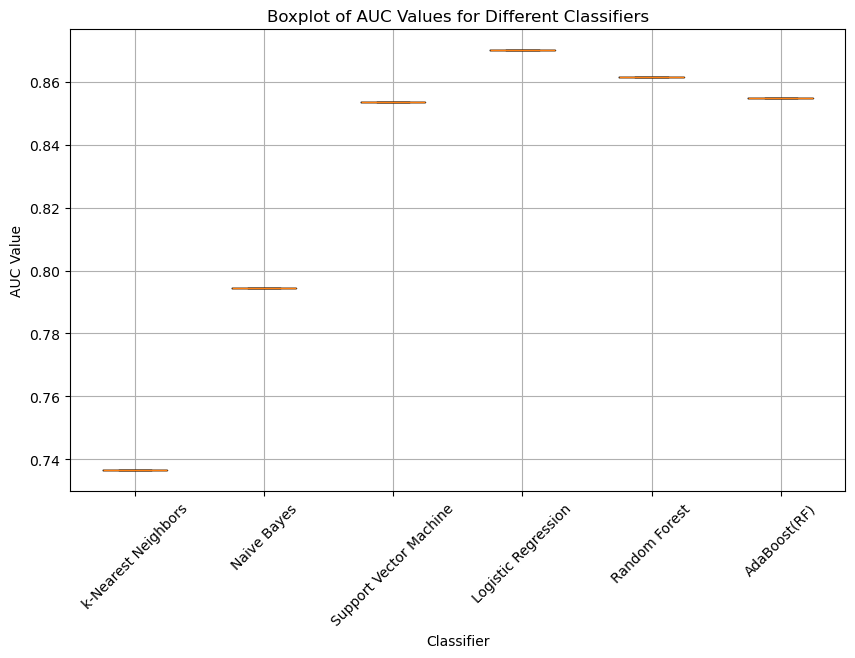

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC


# Initialize classifiers_for_car_evolution
# classifiers = {
#     "Logistic Regression": LogisticRegression(),
#     "Naive Bayes": GaussianNB(),
#     "k-Nearest Neighbors": KNeighborsClassifier(),
#     "Support Vector Machine": SVC(probability=True),
#     "Random Forest": RandomForestClassifier(),
#     # "AdaBoost": AdaBoostClassifier()
#     "AdaBoost(RF)": AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, learning_rate=1.0, random_state=42)
#  }

# Initialize classifiers_for_yeast5
# classifiers = {
#     "Naive Bayes": GaussianNB(),
#     "k-Nearest Neighbors": KNeighborsClassifier(),
#     "Logistic Regression": LogisticRegression(),
#     "Support Vector Machine": SVC(probability=True),
#     "Random Forest": RandomForestClassifier(),
#     # "AdaBoost": AdaBoostClassifier()
#     "AdaBoost(RF)": AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, learning_rate=1.0, random_state=42)
#  }

# Initialize classifiers_for_pima
classifiers = {
 "k-Nearest Neighbors": KNeighborsClassifier(),
  "Naive Bayes": GaussianNB(),
     "Support Vector Machine": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
 
    "Random Forest": RandomForestClassifier(),
    # "AdaBoost": AdaBoostClassifier()
    "AdaBoost(RF)": AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, learning_rate=1.0, random_state=42)
 }

auc_values = {classifier_name: [] for classifier_name in classifiers}

# Train each classifier and calculate AUC on testing data
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_prob = classifier.predict_proba(X_test)[:, 1]  # probability of the positive class
    auc = roc_auc_score(y_test, y_prob)
    print(classifier_name, ":", auc)
    auc_values[classifier_name].append(auc)

# Plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(auc_values.values(), labels=auc_values.keys())
plt.title('Boxplot of AUC Values for Different Classifiers')
plt.ylabel('AUC Value')
plt.xlabel('Classifier')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()